## 1.线性模型

最基本的线性模型

In [11]:
import numpy as np
import matplotlib.pylab as plt

In [12]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [13]:
def forward(x):
  return x * w

In [14]:
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y)**2

In [15]:
w_list = []
mse_list = []

In [16]:
for w in np.arange(0.0, 4.1, 0.1):
  print("w=", w)
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    loss_val = loss(x_val, y_val)
    l_sum += loss_val
    print('\t', x_val, y_val, y_pred_val, loss_val)
  print("MSE=", l_sum / 3)
  w_list.append(w)
  mse_list.append(l_sum / 3)

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

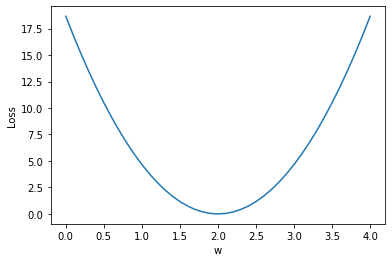

In [18]:
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

作业：y = x * w + b

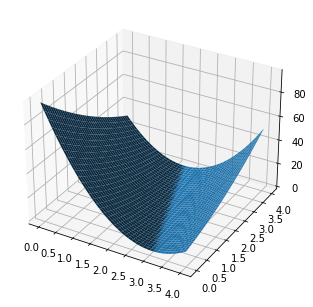

In [6]:
# y = 2x + 3.2
"""
x 1 2 3 4 
y 5 7 9 11
"""

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


x_data = [1.0, 2.0, 3.0, 4.0]
y_data = [5.2, 7.2, 9.2, 11.2]

def forward(x):
    y_hat = x * w + b
    return y_hat

def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y)**2

mse_list = []
w = np.arange(0.0,4.1,0.1)
b = np.arange(0.0,4.1,0.1)
[w,b]=np.meshgrid(w,b)

l_sum = 0
for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    #print(y_pred_val)
    loss_val = loss(x_val, y_val)
    l_sum += loss_val

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(w, b, l_sum/3)
plt.show()

## 2.梯度下降算法

In [28]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0
learning_rate = 0.01

def forward(x):
    return x *w

def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        cost += (y_pred - y) **2
        return cost / len(xs)

def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2 * x * (x * w - y)
        return grad / len(xs)

print("Predict (before training)", 4, forward(4))
cost_list = []
epoch_list = []
for epoch in range(500):
    cost_val = cost(x_data, y_data)
    grad_val = gradient(x_data, y_data)
    w -= learning_rate * grad_val
    cost_list.append(cost_val)
    epoch_list.append(epoch)
    print("Epoch:", epoch, "w = ", w, "loss = ", cost_val)

print("Predict (after traing)", 4, forward(4))

Predict (before training) 4 4.0
Epoch: 0 w =  1.0066666666666666 loss =  0.3333333333333333
Epoch: 1 w =  1.013288888888889 loss =  0.32890370370370375
Epoch: 2 w =  1.019866962962963 loss =  0.32453293893004115
Epoch: 3 w =  1.0264011832098767 loss =  0.3202202567638152
Epoch: 4 w =  1.0328918419884776 loss =  0.31596488535170936
Epoch: 5 w =  1.0393392297085544 loss =  0.31176606309747995
Epoch: 6 w =  1.0457436348438307 loss =  0.3076230385256512
Epoch: 7 w =  1.0521053439448718 loss =  0.30353507014702147
Epoch: 8 w =  1.0584246416519059 loss =  0.2995014263259566
Epoch: 9 w =  1.0647018107075599 loss =  0.2955213851494473
Epoch: 10 w =  1.0709371319695096 loss =  0.2915942342979057
Epoch: 11 w =  1.0771308844230463 loss =  0.2877192709176802
Epoch: 12 w =  1.0832833451935593 loss =  0.2838958014952629
Epoch: 13 w =  1.0893947895589355 loss =  0.2801231417331703
Epoch: 14 w =  1.095465490961876 loss =  0.27640061642747177
Epoch: 15 w =  1.1014957210221301 loss =  0.2727275593469467

Epoch: 281 w =  1.8483673801681104 loss =  0.007767370185042016
Epoch: 282 w =  1.849378264300323 loss =  0.007664150465694118
Epoch: 283 w =  1.8503824092049874 loss =  0.0075623024217277915
Epoch: 284 w =  1.8513798598102875 loss =  0.007461807825101277
Epoch: 285 w =  1.8523706607448855 loss =  0.007362648690003263
Epoch: 286 w =  1.8533548563399196 loss =  0.007264807269633893
Epoch: 287 w =  1.8543324906309868 loss =  0.00716826605302854
Epoch: 288 w =  1.8553036073601137 loss =  0.007073007761923847
Epoch: 289 w =  1.856268249977713 loss =  0.006979015347665382
Epoch: 290 w =  1.8572264616445282 loss =  0.0068862719881564
Epoch: 291 w =  1.8581782852335647 loss =  0.006794761084847126
Epoch: 292 w =  1.8591237633320075 loss =  0.006704466259764049
Epoch: 293 w =  1.8600629382431275 loss =  0.006615371352578748
Epoch: 294 w =  1.8609958519881733 loss =  0.0065274604177155806
Epoch: 295 w =  1.861922546308252 loss =  0.0064407177214979424
Epoch: 296 w =  1.862843062666197 loss =  0

Epoch: 499 w =  1.9647219413187187 loss =  0.0004204342454123443
Predict (after traing) 4 7.858887765274875


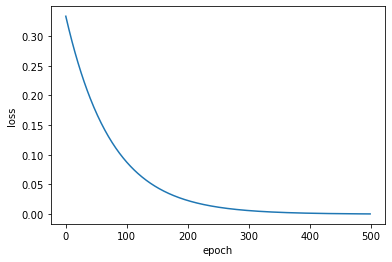

In [31]:
plt.plot(epoch_list, cost_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 3.反向传播

In [139]:
import torch

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.Tensor([1.0])
w.requires_grad = True

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

print('训练前：', 4, forward(4))

for epoch in range(400):
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()
        # print(x, y, w.grad.item())
        print("w.data",w.data, "w.grad.data",  w.grad.data)
        w.data = w.data - 0.01 * w.grad.data
        w.grad.data.zero_()
    print(epoch, l.item())

print(4, forward(4).item())

训练前： 4 tensor([4.], grad_fn=<MulBackward0>)
w.data tensor([1.]) w.grad.data tensor([-2.])
w.data tensor([1.0200]) w.grad.data tensor([-7.8400])
w.data tensor([1.0984]) w.grad.data tensor([-16.2288])
0 7.315943717956543
w.data tensor([1.2607]) w.grad.data tensor([-1.4786])
w.data tensor([1.2755]) w.grad.data tensor([-5.7962])
w.data tensor([1.3334]) w.grad.data tensor([-11.9981])
1 3.9987640380859375
w.data tensor([1.4534]) w.grad.data tensor([-1.0932])
w.data tensor([1.4643]) w.grad.data tensor([-4.2852])
w.data tensor([1.5072]) w.grad.data tensor([-8.8704])
2 2.1856532096862793
w.data tensor([1.5959]) w.grad.data tensor([-0.8082])
w.data tensor([1.6040]) w.grad.data tensor([-3.1681])
w.data tensor([1.6357]) w.grad.data tensor([-6.5580])
3 1.1946394443511963
w.data tensor([1.7012]) w.grad.data tensor([-0.5975])
w.data tensor([1.7072]) w.grad.data tensor([-2.3422])
w.data tensor([1.7306]) w.grad.data tensor([-4.8484])
4 0.6529689431190491
w.data tensor([1.7791]) w.grad.data tensor([-0.4

w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
51 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
52 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
53 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
54 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
55 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.dat

w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
93 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
94 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
95 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
96 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
97 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.dat

w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
138 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
139 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
140 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
141 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
142 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])


w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
196 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
197 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
198 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
199 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
200 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])


w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
250 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
251 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
252 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
253 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
254 9.094947017729282e-13


w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
303 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
304 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
305 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
306 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
307 9.094947017729282e-13


w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
348 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
349 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
350 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
351 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])
w.data tensor([2.0000]) w.grad.data tensor([-5.7220e-06])
352 9.094947017729282e-13
w.data tensor([2.0000]) w.grad.data tensor([-7.1526e-07])
w.data tensor([2.0000]) w.grad.data tensor([-2.8610e-06])


## 4.用Pytorch实现线性回归

$y_{}^{'} = wx + b$

基本流程：

1. Prepare dataset

2. Design model using Class

3. Contruct loss and optimizer

4. Training cycle


In [165]:
# 
import torch

# x_data = [1.0, 2.0, 3.0]
# y_data = [2.0, 4.0, 6.0]

x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=True)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, ":", loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('w=', model.linear.weight.item(), "\t b=", model.linear.bias.item())
    x_test = torch.Tensor([5])
    y_test = model(x_test)
    print("y_pred=", y_test.data)


0 : tensor(9.8005, grad_fn=<MseLossBackward>)
w= 0.8128864765167236 	 b= -0.2351824939250946
y_pred= tensor([3.8292])
1 : tensor(7.7485, grad_fn=<MseLossBackward>)
w= 0.9330910444259644 	 b= -0.1829943060874939
y_pred= tensor([4.4825])
2 : tensor(6.1265, grad_fn=<MseLossBackward>)
w= 1.0399889945983887 	 b= -0.13665805757045746
y_pred= tensor([5.0633])
3 : tensor(4.8443, grad_fn=<MseLossBackward>)
w= 1.1350563764572144 	 b= -0.09552445262670517
y_pred= tensor([5.5798])
4 : tensor(3.8309, grad_fn=<MseLossBackward>)
w= 1.2196054458618164 	 b= -0.05901621654629707
y_pred= tensor([6.0390])
5 : tensor(3.0298, grad_fn=<MseLossBackward>)
w= 1.2948029041290283 	 b= -0.026620112359523773
y_pred= tensor([6.4474])
6 : tensor(2.3965, grad_fn=<MseLossBackward>)
w= 1.361686110496521 	 b= 0.002120174467563629
y_pred= tensor([6.8106])
7 : tensor(1.8960, grad_fn=<MseLossBackward>)
w= 1.4211772680282593 	 b= 0.027610329911112785
y_pred= tensor([7.1335])
8 : tensor(1.5003, grad_fn=<MseLossBackward>)
w= 1

88 : tensor(0.0055, grad_fn=<MseLossBackward>)
w= 1.9143654108047485 	 b= 0.19457344710826874
y_pred= tensor([9.7664])
89 : tensor(0.0054, grad_fn=<MseLossBackward>)
w= 1.9145749807357788 	 b= 0.19410735368728638
y_pred= tensor([9.7670])
90 : tensor(0.0054, grad_fn=<MseLossBackward>)
w= 1.9147837162017822 	 b= 0.19364221394062042
y_pred= tensor([9.7676])
91 : tensor(0.0054, grad_fn=<MseLossBackward>)
w= 1.9149914979934692 	 b= 0.19317802786827087
y_pred= tensor([9.7681])
92 : tensor(0.0054, grad_fn=<MseLossBackward>)
w= 1.9151984453201294 	 b= 0.19271481037139893
y_pred= tensor([9.7687])
93 : tensor(0.0053, grad_fn=<MseLossBackward>)
w= 1.9154046773910522 	 b= 0.19225257635116577
y_pred= tensor([9.7693])
94 : tensor(0.0053, grad_fn=<MseLossBackward>)
w= 1.9156101942062378 	 b= 0.1917913407087326
y_pred= tensor([9.7698])
95 : tensor(0.0053, grad_fn=<MseLossBackward>)
w= 1.9158148765563965 	 b= 0.19133110344409943
y_pred= tensor([9.7704])
96 : tensor(0.0053, grad_fn=<MseLossBackward>)
w=

w= 1.9288808107376099 	 b= 0.16167084872722626
y_pred= tensor([9.8061])
166 : tensor(0.0037, grad_fn=<MseLossBackward>)
w= 1.9290517568588257 	 b= 0.16128219664096832
y_pred= tensor([9.8065])
167 : tensor(0.0037, grad_fn=<MseLossBackward>)
w= 1.9292223453521729 	 b= 0.1608944833278656
y_pred= tensor([9.8070])
168 : tensor(0.0037, grad_fn=<MseLossBackward>)
w= 1.9293924570083618 	 b= 0.1605076938867569
y_pred= tensor([9.8075])
169 : tensor(0.0037, grad_fn=<MseLossBackward>)
w= 1.9295622110366821 	 b= 0.1601218432188034
y_pred= tensor([9.8079])
170 : tensor(0.0037, grad_fn=<MseLossBackward>)
w= 1.9297314882278442 	 b= 0.15973691642284393
y_pred= tensor([9.8084])
171 : tensor(0.0037, grad_fn=<MseLossBackward>)
w= 1.9299004077911377 	 b= 0.15935291349887848
y_pred= tensor([9.8089])
172 : tensor(0.0036, grad_fn=<MseLossBackward>)
w= 1.9300689697265625 	 b= 0.15896983444690704
y_pred= tensor([9.8093])
173 : tensor(0.0036, grad_fn=<MseLossBackward>)
w= 1.930237054824829 	 b= 0.158587679266929

w= 1.939763069152832 	 b= 0.13693296909332275
y_pred= tensor([9.8357])
235 : tensor(0.0027, grad_fn=<MseLossBackward>)
w= 1.9399079084396362 	 b= 0.13660378754138947
y_pred= tensor([9.8361])
236 : tensor(0.0027, grad_fn=<MseLossBackward>)
w= 1.9400523900985718 	 b= 0.13627539575099945
y_pred= tensor([9.8365])
237 : tensor(0.0027, grad_fn=<MseLossBackward>)
w= 1.9401965141296387 	 b= 0.1359477937221527
y_pred= tensor([9.8369])
238 : tensor(0.0027, grad_fn=<MseLossBackward>)
w= 1.940340280532837 	 b= 0.13562098145484924
y_pred= tensor([9.8373])
239 : tensor(0.0026, grad_fn=<MseLossBackward>)
w= 1.9404836893081665 	 b= 0.13529494404792786
y_pred= tensor([9.8377])
240 : tensor(0.0026, grad_fn=<MseLossBackward>)
w= 1.9406267404556274 	 b= 0.13496969640254974
y_pred= tensor([9.8381])
241 : tensor(0.0026, grad_fn=<MseLossBackward>)
w= 1.9407694339752197 	 b= 0.1346452385187149
y_pred= tensor([9.8385])
242 : tensor(0.0026, grad_fn=<MseLossBackward>)
w= 1.9409117698669434 	 b= 0.134321555495262

y_pred= tensor([9.8642])
314 : tensor(0.0018, grad_fn=<MseLossBackward>)
w= 1.9503130912780762 	 b= 0.11294997483491898
y_pred= tensor([9.8645])
315 : tensor(0.0018, grad_fn=<MseLossBackward>)
w= 1.950432538986206 	 b= 0.11267845332622528
y_pred= tensor([9.8648])
316 : tensor(0.0018, grad_fn=<MseLossBackward>)
w= 1.9505517482757568 	 b= 0.11240758001804352
y_pred= tensor([9.8652])
317 : tensor(0.0018, grad_fn=<MseLossBackward>)
w= 1.950670599937439 	 b= 0.11213735491037369
y_pred= tensor([9.8655])
318 : tensor(0.0018, grad_fn=<MseLossBackward>)
w= 1.950789213180542 	 b= 0.11186778545379639
y_pred= tensor([9.8658])
319 : tensor(0.0018, grad_fn=<MseLossBackward>)
w= 1.9509074687957764 	 b= 0.11159886419773102
y_pred= tensor([9.8661])
320 : tensor(0.0018, grad_fn=<MseLossBackward>)
w= 1.9510254859924316 	 b= 0.11133059114217758
y_pred= tensor([9.8665])
321 : tensor(0.0018, grad_fn=<MseLossBackward>)
w= 1.9511432647705078 	 b= 0.11106295883655548
y_pred= tensor([9.8668])
322 : tensor(0.001

397 : tensor(0.0012, grad_fn=<MseLossBackward>)
w= 1.9593104124069214 	 b= 0.09249718487262726
y_pred= tensor([9.8890])
398 : tensor(0.0012, grad_fn=<MseLossBackward>)
w= 1.959408164024353 	 b= 0.09227482229471207
y_pred= tensor([9.8893])
399 : tensor(0.0012, grad_fn=<MseLossBackward>)
w= 1.9595057964324951 	 b= 0.09205300360918045
y_pred= tensor([9.8896])
400 : tensor(0.0012, grad_fn=<MseLossBackward>)
w= 1.959603190422058 	 b= 0.09183171391487122
y_pred= tensor([9.8898])
401 : tensor(0.0012, grad_fn=<MseLossBackward>)
w= 1.959700345993042 	 b= 0.09161095321178436
y_pred= tensor([9.8901])
402 : tensor(0.0012, grad_fn=<MseLossBackward>)
w= 1.9597972631454468 	 b= 0.09139072149991989
y_pred= tensor([9.8904])
403 : tensor(0.0012, grad_fn=<MseLossBackward>)
w= 1.9598939418792725 	 b= 0.0911710187792778
y_pred= tensor([9.8906])
404 : tensor(0.0012, grad_fn=<MseLossBackward>)
w= 1.959990382194519 	 b= 0.0909518450498581
y_pred= tensor([9.8909])
405 : tensor(0.0012, grad_fn=<MseLossBackward>

485 : tensor(0.0008, grad_fn=<MseLossBackward>)
w= 1.9670770168304443 	 b= 0.07484172284603119
y_pred= tensor([9.9102])
486 : tensor(0.0008, grad_fn=<MseLossBackward>)
w= 1.967156171798706 	 b= 0.07466181367635727
y_pred= tensor([9.9104])
487 : tensor(0.0008, grad_fn=<MseLossBackward>)
w= 1.9672350883483887 	 b= 0.07448233664035797
y_pred= tensor([9.9107])
488 : tensor(0.0008, grad_fn=<MseLossBackward>)
w= 1.9673138856887817 	 b= 0.0743032842874527
y_pred= tensor([9.9109])
489 : tensor(0.0008, grad_fn=<MseLossBackward>)
w= 1.9673924446105957 	 b= 0.07412466406822205
y_pred= tensor([9.9111])
490 : tensor(0.0008, grad_fn=<MseLossBackward>)
w= 1.9674708843231201 	 b= 0.07394646853208542
y_pred= tensor([9.9113])
491 : tensor(0.0008, grad_fn=<MseLossBackward>)
w= 1.9675490856170654 	 b= 0.07376870512962341
y_pred= tensor([9.9115])
492 : tensor(0.0008, grad_fn=<MseLossBackward>)
w= 1.9676270484924316 	 b= 0.07359137386083603
y_pred= tensor([9.9117])
493 : tensor(0.0008, grad_fn=<MseLossBackw

w= 1.9740570783615112 	 b= 0.05897413194179535
y_pred= tensor([9.9293])
585 : tensor(0.0005, grad_fn=<MseLossBackward>)
w= 1.9741194248199463 	 b= 0.05883236601948738
y_pred= tensor([9.9294])
586 : tensor(0.0005, grad_fn=<MseLossBackward>)
w= 1.9741816520690918 	 b= 0.05869094282388687
y_pred= tensor([9.9296])
587 : tensor(0.0005, grad_fn=<MseLossBackward>)
w= 1.9742437601089478 	 b= 0.05854985490441322
y_pred= tensor([9.9298])
588 : tensor(0.0005, grad_fn=<MseLossBackward>)
w= 1.9743056297302246 	 b= 0.058409109711647034
y_pred= tensor([9.9299])
589 : tensor(0.0005, grad_fn=<MseLossBackward>)
w= 1.974367380142212 	 b= 0.058268699795007706
y_pred= tensor([9.9301])
590 : tensor(0.0005, grad_fn=<MseLossBackward>)
w= 1.9744290113449097 	 b= 0.05812862887978554
y_pred= tensor([9.9303])
591 : tensor(0.0005, grad_fn=<MseLossBackward>)
w= 1.9744905233383179 	 b= 0.05798889324069023
y_pred= tensor([9.9304])
592 : tensor(0.0005, grad_fn=<MseLossBackward>)
w= 1.974551796913147 	 b= 0.05784949287

y_pred= tensor([9.9401])
654 : tensor(0.0004, grad_fn=<MseLossBackward>)
w= 1.9780794382095337 	 b= 0.04983028769493103
y_pred= tensor([9.9402])
655 : tensor(0.0004, grad_fn=<MseLossBackward>)
w= 1.9781321287155151 	 b= 0.049710504710674286
y_pred= tensor([9.9404])
656 : tensor(0.0004, grad_fn=<MseLossBackward>)
w= 1.978184700012207 	 b= 0.04959101229906082
y_pred= tensor([9.9405])
657 : tensor(0.0004, grad_fn=<MseLossBackward>)
w= 1.9782371520996094 	 b= 0.04947180300951004
y_pred= tensor([9.9407])
658 : tensor(0.0004, grad_fn=<MseLossBackward>)
w= 1.9782894849777222 	 b= 0.04935288056731224
y_pred= tensor([9.9408])
659 : tensor(0.0003, grad_fn=<MseLossBackward>)
w= 1.9783416986465454 	 b= 0.04923424497246742
y_pred= tensor([9.9409])
660 : tensor(0.0003, grad_fn=<MseLossBackward>)
w= 1.978393793106079 	 b= 0.04911589249968529
y_pred= tensor([9.9411])
661 : tensor(0.0003, grad_fn=<MseLossBackward>)
w= 1.9784457683563232 	 b= 0.048997823148965836
y_pred= tensor([9.9412])
662 : tensor(0.

760 : tensor(0.0002, grad_fn=<MseLossBackward>)
w= 1.983015537261963 	 b= 0.0386095829308033
y_pred= tensor([9.9537])
761 : tensor(0.0002, grad_fn=<MseLossBackward>)
w= 1.9830564260482788 	 b= 0.03851677104830742
y_pred= tensor([9.9538])
762 : tensor(0.0002, grad_fn=<MseLossBackward>)
w= 1.9830971956253052 	 b= 0.03842417895793915
y_pred= tensor([9.9539])
763 : tensor(0.0002, grad_fn=<MseLossBackward>)
w= 1.983137845993042 	 b= 0.038331806659698486
y_pred= tensor([9.9540])
764 : tensor(0.0002, grad_fn=<MseLossBackward>)
w= 1.9831783771514893 	 b= 0.03823965787887573
y_pred= tensor([9.9541])
765 : tensor(0.0002, grad_fn=<MseLossBackward>)
w= 1.983218789100647 	 b= 0.03814772889018059
y_pred= tensor([9.9542])
766 : tensor(0.0002, grad_fn=<MseLossBackward>)
w= 1.9832590818405151 	 b= 0.03805601969361305
y_pred= tensor([9.9544])
767 : tensor(0.0002, grad_fn=<MseLossBackward>)
w= 1.9832993745803833 	 b= 0.03796453773975372
y_pred= tensor([9.9545])
768 : tensor(0.0002, grad_fn=<MseLossBackwa

w= 1.9861578941345215 	 b= 0.0314662903547287
y_pred= tensor([9.9623])
846 : tensor(0.0001, grad_fn=<MseLossBackward>)
w= 1.9861911535263062 	 b= 0.03139064833521843
y_pred= tensor([9.9623])
847 : tensor(0.0001, grad_fn=<MseLossBackward>)
w= 1.9862244129180908 	 b= 0.031315192580223083
y_pred= tensor([9.9624])
848 : tensor(0.0001, grad_fn=<MseLossBackward>)
w= 1.986257553100586 	 b= 0.031239910051226616
y_pred= tensor([9.9625])
849 : tensor(0.0001, grad_fn=<MseLossBackward>)
w= 1.9862905740737915 	 b= 0.031164808198809624
y_pred= tensor([9.9626])
850 : tensor(0.0001, grad_fn=<MseLossBackward>)
w= 1.9863234758377075 	 b= 0.031089888885617256
y_pred= tensor([9.9627])
851 : tensor(0.0001, grad_fn=<MseLossBackward>)
w= 1.9863563776016235 	 b= 0.031015150249004364
y_pred= tensor([9.9628])
852 : tensor(0.0001, grad_fn=<MseLossBackward>)
w= 1.98638916015625 	 b= 0.030940594151616096
y_pred= tensor([9.9629])
853 : tensor(0.0001, grad_fn=<MseLossBackward>)
w= 1.9864219427108765 	 b= 0.030866216

930 : tensor(9.4800e-05, grad_fn=<MseLossBackward>)
w= 1.9887189865112305 	 b= 0.025644619017839432
y_pred= tensor([9.9692])
931 : tensor(9.4342e-05, grad_fn=<MseLossBackward>)
w= 1.9887460470199585 	 b= 0.025582965463399887
y_pred= tensor([9.9693])
932 : tensor(9.3891e-05, grad_fn=<MseLossBackward>)
w= 1.9887731075286865 	 b= 0.02552146650850773
y_pred= tensor([9.9694])
933 : tensor(9.3442e-05, grad_fn=<MseLossBackward>)
w= 1.988800048828125 	 b= 0.02546011656522751
y_pred= tensor([9.9695])
934 : tensor(9.2989e-05, grad_fn=<MseLossBackward>)
w= 1.9888269901275635 	 b= 0.02539891190826893
y_pred= tensor([9.9695])
935 : tensor(9.2544e-05, grad_fn=<MseLossBackward>)
w= 1.9888538122177124 	 b= 0.025337854400277138
y_pred= tensor([9.9696])
936 : tensor(9.2101e-05, grad_fn=<MseLossBackward>)
w= 1.9888806343078613 	 b= 0.025276945903897285
y_pred= tensor([9.9697])
937 : tensor(9.1657e-05, grad_fn=<MseLossBackward>)
w= 1.9889073371887207 	 b= 0.025216178968548775
y_pred= tensor([9.9698])
938 

In [168]:
model.linear.weight

Parameter containing:
tensor([[1.9904]], requires_grad=True)

In [148]:
torch.mm(x_data, y_data.t())

tensor([[ 2.,  4.,  6.],
        [ 4.,  8., 12.],
        [ 6., 12., 18.]])

## 5. Logistic 回归

In [171]:
import torch
from torch.functional import F  
import numpy as np
import matplotlib.pyplot as plt


# x_data = [1.0, 2.0, 3.0]
# y_data = [2.0, 4.0, 6.0]

# 学习时间和是否通过考试分类
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        # 和线性回归的区别
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, ":", loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print('w=', model.linear.weight.item(), "\t b=", model.linear.bias.item())
    # x_test = torch.Tensor([5])
    # y_test = model(x_test)
    # print("y_pred=", y_test.data)



0 : 0.8695695996284485
1 : 0.8678262233734131
2 : 0.8661195635795593
3 : 0.8644490838050842
4 : 0.8628137111663818
5 : 0.861212968826294
6 : 0.859645426273346
7 : 0.8581109046936035
8 : 0.8566081523895264
9 : 0.8551368713378906
10 : 0.8536959290504456
11 : 0.8522849082946777
12 : 0.850902795791626
13 : 0.8495489954948425
14 : 0.8482230305671692
15 : 0.8469238877296448
16 : 0.8456513285636902
17 : 0.8444042205810547
18 : 0.8431821465492249
19 : 0.8419846892356873
20 : 0.8408108353614807
21 : 0.8396602272987366
22 : 0.8385323882102966
23 : 0.8374266624450684
24 : 0.8363423347473145
25 : 0.8352790474891663
26 : 0.8342361450195312
27 : 0.8332131505012512
28 : 0.8322098255157471
29 : 0.8312252163887024
30 : 0.8302591443061829
31 : 0.829310953617096
32 : 0.8283803462982178
33 : 0.8274667263031006
34 : 0.8265697956085205
35 : 0.8256890773773193
36 : 0.8248241543769836
37 : 0.823974609375
38 : 0.8231399655342102
39 : 0.8223199844360352
40 : 0.8215141892433167
41 : 0.8207221627235413
42 : 0.819

381 : 0.7109658122062683
382 : 0.7107214331626892
383 : 0.7104771137237549
384 : 0.7102330327033997
385 : 0.709989070892334
386 : 0.7097452282905579
387 : 0.7095016837120056
388 : 0.7092581391334534
389 : 0.7090148329734802
390 : 0.7087716460227966
391 : 0.7085285186767578
392 : 0.7082856297492981
393 : 0.7080428600311279
394 : 0.7078002095222473
395 : 0.7075576782226562
396 : 0.7073153853416443
397 : 0.7070732116699219
398 : 0.7068312168121338
399 : 0.70658940076828
400 : 0.7063475251197815
401 : 0.7061059474945068
402 : 0.7058644890785217
403 : 0.705623209476471
404 : 0.7053820490837097
405 : 0.705141007900238
406 : 0.7049000859260559
407 : 0.7046594619750977
408 : 0.7044188380241394
409 : 0.7041783332824707
410 : 0.7039381861686707
411 : 0.703697919845581
412 : 0.7034580111503601
413 : 0.7032181620597839
414 : 0.7029783129692078
415 : 0.7027387619018555
416 : 0.7024993896484375
417 : 0.7022600173950195
418 : 0.7020208835601807
419 : 0.7017819285392761
420 : 0.7015430927276611
421 : 

716 : 0.6367767453193665
717 : 0.6365768313407898
718 : 0.6363769173622131
719 : 0.636177122592926
720 : 0.635977566242218
721 : 0.63577800989151
722 : 0.6355786919593811
723 : 0.6353793144226074
724 : 0.6351802349090576
725 : 0.6349812150001526
726 : 0.6347822546958923
727 : 0.6345834732055664
728 : 0.6343846917152405
729 : 0.6341862082481384
730 : 0.6339876651763916
731 : 0.6337893605232239
732 : 0.6335912346839905
733 : 0.6333931088447571
734 : 0.6331951022148132
735 : 0.6329972743988037
736 : 0.6327994465827942
737 : 0.6326019167900085
738 : 0.6324043869972229
739 : 0.6322069764137268
740 : 0.6320096850395203
741 : 0.6318126320838928
742 : 0.6316154599189758
743 : 0.6314185261726379
744 : 0.6312217712402344
745 : 0.6310251355171204
746 : 0.6308285593986511
747 : 0.6306320428848267
748 : 0.6304357647895813
749 : 0.6302394270896912
750 : 0.6300433874130249
751 : 0.6298473477363586
752 : 0.6296514868736267
753 : 0.6294557452201843
754 : 0.6292601227760315
755 : 0.6290646195411682
756 

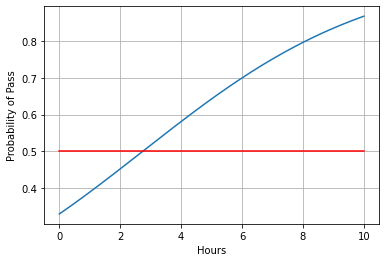

In [174]:
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

## 6. 处理多维特征输入

In [2]:
import numpy as np
import torch

In [5]:
xy = np.loadtxt('../doc/diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1])
y_data = torch.from_numpy(xy[:, [-1]])

In [16]:
xy.shape, x_data.shape, y_data.shape

((759, 9), torch.Size([759, 8]), torch.Size([759, 1]))

In [22]:
import numpy as np
import torch

xy = np.loadtxt(r'D:\code\python\tmp\hgd_DeepLearning\doc\diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1])
y_data = torch.from_numpy(xy[:, [-1]])

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
        
model = Model()
criterion = torch.nn.BCELoss(size_average=True)
# Adam收敛的更快一些
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


for epoch in range(1000):
    # Forward
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print("Epoch: ", epoch, "   Loss:", loss.item())

    # Backward
    optimizer.zero_grad()
    loss.backward()

    # Update
    optimizer.step()


Epoch:  0    Loss: 0.7150929570198059
Epoch:  1    Loss: 0.7073532342910767
Epoch:  2    Loss: 0.700061559677124
Epoch:  3    Loss: 0.6932289600372314
Epoch:  4    Loss: 0.6868628859519958
Epoch:  5    Loss: 0.6809678077697754
Epoch:  6    Loss: 0.6755450963973999
Epoch:  7    Loss: 0.6705924272537231
Epoch:  8    Loss: 0.6661044359207153
Epoch:  9    Loss: 0.6620724201202393
Epoch:  10    Loss: 0.6584846377372742
Epoch:  11    Loss: 0.6553259491920471
Epoch:  12    Loss: 0.6525784134864807
Epoch:  13    Loss: 0.6502215266227722
Epoch:  14    Loss: 0.648231565952301
Epoch:  15    Loss: 0.6465824842453003
Epoch:  16    Loss: 0.6452462077140808
Epoch:  17    Loss: 0.6441925764083862
Epoch:  18    Loss: 0.6433899998664856
Epoch:  19    Loss: 0.642805814743042
Epoch:  20    Loss: 0.642406702041626
Epoch:  21    Loss: 0.642159640789032
Epoch:  22    Loss: 0.6420319676399231
Epoch:  23    Loss: 0.6419929265975952
Epoch:  24    Loss: 0.6420135498046875
Epoch:  25    Loss: 0.6420679092407227
E

Epoch:  247    Loss: 0.46157950162887573
Epoch:  248    Loss: 0.46138566732406616
Epoch:  249    Loss: 0.4611884355545044
Epoch:  250    Loss: 0.4609876275062561
Epoch:  251    Loss: 0.4607833921909332
Epoch:  252    Loss: 0.4605754613876343
Epoch:  253    Loss: 0.4603639245033264
Epoch:  254    Loss: 0.46014875173568726
Epoch:  255    Loss: 0.459929883480072
Epoch:  256    Loss: 0.4597073495388031
Epoch:  257    Loss: 0.4594811797142029
Epoch:  258    Loss: 0.45925140380859375
Epoch:  259    Loss: 0.4590179920196533
Epoch:  260    Loss: 0.45878103375434875
Epoch:  261    Loss: 0.45854052901268005
Epoch:  262    Loss: 0.45829659700393677
Epoch:  263    Loss: 0.45804914832115173
Epoch:  264    Loss: 0.45779848098754883
Epoch:  265    Loss: 0.4575445353984833
Epoch:  266    Loss: 0.45728737115859985
Epoch:  267    Loss: 0.4570271074771881
Epoch:  268    Loss: 0.45676377415657043
Epoch:  269    Loss: 0.45649752020835876
Epoch:  270    Loss: 0.45622846484184265
Epoch:  271    Loss: 0.45595

Epoch:  450    Loss: 0.4273044466972351
Epoch:  451    Loss: 0.42721158266067505
Epoch:  452    Loss: 0.4271180331707001
Epoch:  453    Loss: 0.4270237386226654
Epoch:  454    Loss: 0.42692872881889343
Epoch:  455    Loss: 0.4268328845500946
Epoch:  456    Loss: 0.4267362654209137
Epoch:  457    Loss: 0.4266388714313507
Epoch:  458    Loss: 0.42654070258140564
Epoch:  459    Loss: 0.42644166946411133
Epoch:  460    Loss: 0.42634183168411255
Epoch:  461    Loss: 0.4262412190437317
Epoch:  462    Loss: 0.42613983154296875
Epoch:  463    Loss: 0.42603757977485657
Epoch:  464    Loss: 0.4259345233440399
Epoch:  465    Loss: 0.4258306622505188
Epoch:  466    Loss: 0.42572611570358276
Epoch:  467    Loss: 0.4256207346916199
Epoch:  468    Loss: 0.4255146384239197
Epoch:  469    Loss: 0.42540785670280457
Epoch:  470    Loss: 0.4253004193305969
Epoch:  471    Loss: 0.4251922369003296
Epoch:  472    Loss: 0.4250833988189697
Epoch:  473    Loss: 0.42497408390045166
Epoch:  474    Loss: 0.4248641

Epoch:  657    Loss: 0.41296249628067017
Epoch:  658    Loss: 0.41292503476142883
Epoch:  659    Loss: 0.4128875136375427
Epoch:  660    Loss: 0.4128499925136566
Epoch:  661    Loss: 0.41281241178512573
Epoch:  662    Loss: 0.4127747416496277
Epoch:  663    Loss: 0.41273704171180725
Epoch:  664    Loss: 0.41269925236701965
Epoch:  665    Loss: 0.41266143321990967
Epoch:  666    Loss: 0.4126235842704773
Epoch:  667    Loss: 0.412585586309433
Epoch:  668    Loss: 0.4125475585460663
Epoch:  669    Loss: 0.4125095307826996
Epoch:  670    Loss: 0.41247132420539856
Epoch:  671    Loss: 0.41243305802345276
Epoch:  672    Loss: 0.4123947322368622
Epoch:  673    Loss: 0.41235631704330444
Epoch:  674    Loss: 0.41231781244277954
Epoch:  675    Loss: 0.4122792184352875
Epoch:  676    Loss: 0.41224053502082825
Epoch:  677    Loss: 0.4122017025947571
Epoch:  678    Loss: 0.41216281056404114
Epoch:  679    Loss: 0.4121238589286804
Epoch:  680    Loss: 0.4120847284793854
Epoch:  681    Loss: 0.412045

Epoch:  865    Loss: 0.4035576581954956
Epoch:  866    Loss: 0.4035145044326782
Epoch:  867    Loss: 0.403471440076828
Epoch:  868    Loss: 0.40342843532562256
Epoch:  869    Loss: 0.4033854901790619
Epoch:  870    Loss: 0.40334269404411316
Epoch:  871    Loss: 0.4032999277114868
Epoch:  872    Loss: 0.4032571315765381
Epoch:  873    Loss: 0.4032145142555237
Epoch:  874    Loss: 0.4031718969345093
Epoch:  875    Loss: 0.40312936902046204
Epoch:  876    Loss: 0.40308696031570435
Epoch:  877    Loss: 0.40304452180862427
Epoch:  878    Loss: 0.40300220251083374
Epoch:  879    Loss: 0.402959942817688
Epoch:  880    Loss: 0.40291768312454224
Epoch:  881    Loss: 0.40287554264068604
Epoch:  882    Loss: 0.40283340215682983
Epoch:  883    Loss: 0.4027913510799408
Epoch:  884    Loss: 0.40274932980537415
Epoch:  885    Loss: 0.4027073383331299
Epoch:  886    Loss: 0.40266549587249756
Epoch:  887    Loss: 0.40262359380722046
Epoch:  888    Loss: 0.4025818109512329
Epoch:  889    Loss: 0.4025400

## 7. 加载数据集

In [27]:
import torch
import numpy as np
from torch.utils.data import Dataset # 抽象类 无法实例化
from torch.utils.data import DataLoader # 可以实例化

class DiabetesDataset(Dataset):
    def __init__(self,filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    # 实现两个魔法方法
    # 支持index
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
        
    # len() 
    def __len__(self):
        return self.len

In [28]:

dataset = DiabetesDataset(r'D:\code\python\tmp\hgd_DeepLearning\doc\diabetes.csv.gz')
# num_workers = 2 会存在问题
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)


In [49]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
        
model = Model()
criterion = torch.nn.BCELoss(size_average=True)
# Adam收敛的更快一些
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

F:\anaconda\envs\img\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [51]:
for epoch in range(100):
    for i, data in enumerate(train_loader, 0):
        # 1. Prepare data
        inputs, labels = data  
        # 2. Forward
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        print("Epoch: ", epoch, "    i: ", i, "    Loss: ",loss.item() )
        # 3. Backward
        optimizer.zero_grad()
        loss.backward()
        # 4.Update
        optimizer.step()

Epoch:  0     i:  0     Loss:  0.6955980062484741
Epoch:  0     i:  1     Loss:  0.6859703063964844
Epoch:  0     i:  2     Loss:  0.6792274713516235
Epoch:  0     i:  3     Loss:  0.6847602128982544
Epoch:  0     i:  4     Loss:  0.6780593395233154
Epoch:  0     i:  5     Loss:  0.6645298004150391
Epoch:  0     i:  6     Loss:  0.6715691089630127
Epoch:  0     i:  7     Loss:  0.6624765396118164
Epoch:  0     i:  8     Loss:  0.6766192317008972
Epoch:  0     i:  9     Loss:  0.6264051795005798
Epoch:  0     i:  10     Loss:  0.6427335739135742
Epoch:  0     i:  11     Loss:  0.6515899896621704
Epoch:  0     i:  12     Loss:  0.6361820101737976
Epoch:  0     i:  13     Loss:  0.6478661894798279
Epoch:  0     i:  14     Loss:  0.748672366142273
Epoch:  0     i:  15     Loss:  0.6134616136550903
Epoch:  0     i:  16     Loss:  0.6751768589019775
Epoch:  0     i:  17     Loss:  0.6584152579307556
Epoch:  0     i:  18     Loss:  0.6252596378326416
Epoch:  0     i:  19     Loss:  0.58847892

Epoch:  6     i:  21     Loss:  0.6062271595001221
Epoch:  6     i:  22     Loss:  0.6316049098968506
Epoch:  6     i:  23     Loss:  0.5865544676780701
Epoch:  7     i:  0     Loss:  0.6133700013160706
Epoch:  7     i:  1     Loss:  0.5651460886001587
Epoch:  7     i:  2     Loss:  0.5828322768211365
Epoch:  7     i:  3     Loss:  0.5400227904319763
Epoch:  7     i:  4     Loss:  0.511715292930603
Epoch:  7     i:  5     Loss:  0.57471764087677
Epoch:  7     i:  6     Loss:  0.5049719214439392
Epoch:  7     i:  7     Loss:  0.6068808436393738
Epoch:  7     i:  8     Loss:  0.5559129118919373
Epoch:  7     i:  9     Loss:  0.5994631052017212
Epoch:  7     i:  10     Loss:  0.5837875008583069
Epoch:  7     i:  11     Loss:  0.5173128247261047
Epoch:  7     i:  12     Loss:  0.6555840373039246
Epoch:  7     i:  13     Loss:  0.5261305570602417
Epoch:  7     i:  14     Loss:  0.59306401014328
Epoch:  7     i:  15     Loss:  0.5713154077529907
Epoch:  7     i:  16     Loss:  0.541055023670

Epoch:  14     i:  18     Loss:  0.46511930227279663
Epoch:  14     i:  19     Loss:  0.29452672600746155
Epoch:  14     i:  20     Loss:  0.45616966485977173
Epoch:  14     i:  21     Loss:  0.5967050790786743
Epoch:  14     i:  22     Loss:  0.4703010618686676
Epoch:  14     i:  23     Loss:  0.45003294944763184
Epoch:  15     i:  0     Loss:  0.4638771414756775
Epoch:  15     i:  1     Loss:  0.4980944097042084
Epoch:  15     i:  2     Loss:  0.4370790123939514
Epoch:  15     i:  3     Loss:  0.49099814891815186
Epoch:  15     i:  4     Loss:  0.36506232619285583
Epoch:  15     i:  5     Loss:  0.674645721912384
Epoch:  15     i:  6     Loss:  0.5374890565872192
Epoch:  15     i:  7     Loss:  0.31711918115615845
Epoch:  15     i:  8     Loss:  0.3933059871196747
Epoch:  15     i:  9     Loss:  0.47240787744522095
Epoch:  15     i:  10     Loss:  0.4446042776107788
Epoch:  15     i:  11     Loss:  0.5599479079246521
Epoch:  15     i:  12     Loss:  0.41760221123695374
Epoch:  15    

Epoch:  21     i:  17     Loss:  0.45737552642822266
Epoch:  21     i:  18     Loss:  0.5426940321922302
Epoch:  21     i:  19     Loss:  0.549801230430603
Epoch:  21     i:  20     Loss:  0.6649199724197388
Epoch:  21     i:  21     Loss:  0.4491305649280548
Epoch:  21     i:  22     Loss:  0.49691659212112427
Epoch:  21     i:  23     Loss:  0.3948206603527069
Epoch:  22     i:  0     Loss:  0.4530907869338989
Epoch:  22     i:  1     Loss:  0.4718628227710724
Epoch:  22     i:  2     Loss:  0.5481391549110413
Epoch:  22     i:  3     Loss:  0.5055069327354431
Epoch:  22     i:  4     Loss:  0.3841715455055237
Epoch:  22     i:  5     Loss:  0.4525192975997925
Epoch:  22     i:  6     Loss:  0.41432029008865356
Epoch:  22     i:  7     Loss:  0.44085440039634705
Epoch:  22     i:  8     Loss:  0.48609480261802673
Epoch:  22     i:  9     Loss:  0.39360928535461426
Epoch:  22     i:  10     Loss:  0.451335608959198
Epoch:  22     i:  11     Loss:  0.4653457701206207
Epoch:  22     i: 

Epoch:  29     i:  20     Loss:  0.4852597713470459
Epoch:  29     i:  21     Loss:  0.41917458176612854
Epoch:  29     i:  22     Loss:  0.6013367176055908
Epoch:  29     i:  23     Loss:  0.43886277079582214
Epoch:  30     i:  0     Loss:  0.5565832853317261
Epoch:  30     i:  1     Loss:  0.4358191192150116
Epoch:  30     i:  2     Loss:  0.606031596660614
Epoch:  30     i:  3     Loss:  0.5887839794158936
Epoch:  30     i:  4     Loss:  0.5935682654380798
Epoch:  30     i:  5     Loss:  0.5034874677658081
Epoch:  30     i:  6     Loss:  0.3369221091270447
Epoch:  30     i:  7     Loss:  0.4402788579463959
Epoch:  30     i:  8     Loss:  0.38132259249687195
Epoch:  30     i:  9     Loss:  0.5229153037071228
Epoch:  30     i:  10     Loss:  0.44299423694610596
Epoch:  30     i:  11     Loss:  0.3706256151199341
Epoch:  30     i:  12     Loss:  0.28960660099983215
Epoch:  30     i:  13     Loss:  0.39754924178123474
Epoch:  30     i:  14     Loss:  0.39808207750320435
Epoch:  30     i

Epoch:  36     i:  22     Loss:  0.4207136034965515
Epoch:  36     i:  23     Loss:  0.4522465467453003
Epoch:  37     i:  0     Loss:  0.6404629945755005
Epoch:  37     i:  1     Loss:  0.4837111532688141
Epoch:  37     i:  2     Loss:  0.406627893447876
Epoch:  37     i:  3     Loss:  0.5427221059799194
Epoch:  37     i:  4     Loss:  0.4512418508529663
Epoch:  37     i:  5     Loss:  0.49208685755729675
Epoch:  37     i:  6     Loss:  0.31013306975364685
Epoch:  37     i:  7     Loss:  0.4945322275161743
Epoch:  37     i:  8     Loss:  0.39054742455482483
Epoch:  37     i:  9     Loss:  0.4669707119464874
Epoch:  37     i:  10     Loss:  0.4791635274887085
Epoch:  37     i:  11     Loss:  0.41289758682250977
Epoch:  37     i:  12     Loss:  0.4644995927810669
Epoch:  37     i:  13     Loss:  0.6189916729927063
Epoch:  37     i:  14     Loss:  0.4639893174171448
Epoch:  37     i:  15     Loss:  0.46610450744628906
Epoch:  37     i:  16     Loss:  0.40928566455841064
Epoch:  37     i:

Epoch:  45     i:  3     Loss:  0.4114346206188202
Epoch:  45     i:  4     Loss:  0.46497851610183716
Epoch:  45     i:  5     Loss:  0.5297031998634338
Epoch:  45     i:  6     Loss:  0.2556438148021698
Epoch:  45     i:  7     Loss:  0.55900639295578
Epoch:  45     i:  8     Loss:  0.5662081241607666
Epoch:  45     i:  9     Loss:  0.617591381072998
Epoch:  45     i:  10     Loss:  0.39855921268463135
Epoch:  45     i:  11     Loss:  0.4714507460594177
Epoch:  45     i:  12     Loss:  0.5617696642875671
Epoch:  45     i:  13     Loss:  0.3289419114589691
Epoch:  45     i:  14     Loss:  0.32555294036865234
Epoch:  45     i:  15     Loss:  0.458429753780365
Epoch:  45     i:  16     Loss:  0.4950810968875885
Epoch:  45     i:  17     Loss:  0.4609019458293915
Epoch:  45     i:  18     Loss:  0.5199463367462158
Epoch:  45     i:  19     Loss:  0.6640368700027466
Epoch:  45     i:  20     Loss:  0.41206055879592896
Epoch:  45     i:  21     Loss:  0.3383113145828247
Epoch:  45     i:  

Epoch:  52     i:  1     Loss:  0.5480443835258484
Epoch:  52     i:  2     Loss:  0.5680370926856995
Epoch:  52     i:  3     Loss:  0.4429502487182617
Epoch:  52     i:  4     Loss:  0.3537723422050476
Epoch:  52     i:  5     Loss:  0.4795737862586975
Epoch:  52     i:  6     Loss:  0.5263274312019348
Epoch:  52     i:  7     Loss:  0.5332344770431519
Epoch:  52     i:  8     Loss:  0.4795440435409546
Epoch:  52     i:  9     Loss:  0.45116347074508667
Epoch:  52     i:  10     Loss:  0.4437745213508606
Epoch:  52     i:  11     Loss:  0.4098247289657593
Epoch:  52     i:  12     Loss:  0.3878423571586609
Epoch:  52     i:  13     Loss:  0.5022895932197571
Epoch:  52     i:  14     Loss:  0.32378000020980835
Epoch:  52     i:  15     Loss:  0.4271570146083832
Epoch:  52     i:  16     Loss:  0.5178225040435791
Epoch:  52     i:  17     Loss:  0.3910221755504608
Epoch:  52     i:  18     Loss:  0.5552371144294739
Epoch:  52     i:  19     Loss:  0.528892457485199
Epoch:  52     i:  2

Epoch:  59     i:  6     Loss:  0.4826638996601105
Epoch:  59     i:  7     Loss:  0.5183608531951904
Epoch:  59     i:  8     Loss:  0.4810776710510254
Epoch:  59     i:  9     Loss:  0.43188896775245667
Epoch:  59     i:  10     Loss:  0.35343676805496216
Epoch:  59     i:  11     Loss:  0.5053390264511108
Epoch:  59     i:  12     Loss:  0.6043766736984253
Epoch:  59     i:  13     Loss:  0.6167581081390381
Epoch:  59     i:  14     Loss:  0.4132566750049591
Epoch:  59     i:  15     Loss:  0.3849583566188812
Epoch:  59     i:  16     Loss:  0.41991496086120605
Epoch:  59     i:  17     Loss:  0.5327919125556946
Epoch:  59     i:  18     Loss:  0.4868224859237671
Epoch:  59     i:  19     Loss:  0.3407634496688843
Epoch:  59     i:  20     Loss:  0.44851258397102356
Epoch:  59     i:  21     Loss:  0.6200722455978394
Epoch:  59     i:  22     Loss:  0.2643631100654602
Epoch:  59     i:  23     Loss:  0.4952104687690735
Epoch:  60     i:  0     Loss:  0.531448245048523
Epoch:  60    

Epoch:  65     i:  20     Loss:  0.3383169174194336
Epoch:  65     i:  21     Loss:  0.3592738211154938
Epoch:  65     i:  22     Loss:  0.31613677740097046
Epoch:  65     i:  23     Loss:  0.2605361044406891
Epoch:  66     i:  0     Loss:  0.46231573820114136
Epoch:  66     i:  1     Loss:  0.3186165988445282
Epoch:  66     i:  2     Loss:  0.36025434732437134
Epoch:  66     i:  3     Loss:  0.32536184787750244
Epoch:  66     i:  4     Loss:  0.5316886901855469
Epoch:  66     i:  5     Loss:  0.41937240958213806
Epoch:  66     i:  6     Loss:  0.44886064529418945
Epoch:  66     i:  7     Loss:  0.4085463285446167
Epoch:  66     i:  8     Loss:  0.5249372720718384
Epoch:  66     i:  9     Loss:  0.5214969515800476
Epoch:  66     i:  10     Loss:  0.7115475535392761
Epoch:  66     i:  11     Loss:  0.35289913415908813
Epoch:  66     i:  12     Loss:  0.6522987484931946
Epoch:  66     i:  13     Loss:  0.5295670628547668
Epoch:  66     i:  14     Loss:  0.4559049904346466
Epoch:  66     

Epoch:  73     i:  2     Loss:  0.4596100151538849
Epoch:  73     i:  3     Loss:  0.4244232773780823
Epoch:  73     i:  4     Loss:  0.41975438594818115
Epoch:  73     i:  5     Loss:  0.3752111792564392
Epoch:  73     i:  6     Loss:  0.3514478802680969
Epoch:  73     i:  7     Loss:  0.5455106496810913
Epoch:  73     i:  8     Loss:  0.5760234594345093
Epoch:  73     i:  9     Loss:  0.39577293395996094
Epoch:  73     i:  10     Loss:  0.47538667917251587
Epoch:  73     i:  11     Loss:  0.3595598042011261
Epoch:  73     i:  12     Loss:  0.3137723505496979
Epoch:  73     i:  13     Loss:  0.5343092083930969
Epoch:  73     i:  14     Loss:  0.45267951488494873
Epoch:  73     i:  15     Loss:  0.3975672721862793
Epoch:  73     i:  16     Loss:  0.49214208126068115
Epoch:  73     i:  17     Loss:  0.3953072428703308
Epoch:  73     i:  18     Loss:  0.4623630940914154
Epoch:  73     i:  19     Loss:  0.538059651851654
Epoch:  73     i:  20     Loss:  0.6718968152999878
Epoch:  73     i

Epoch:  80     i:  5     Loss:  0.4925936758518219
Epoch:  80     i:  6     Loss:  0.33115872740745544
Epoch:  80     i:  7     Loss:  0.638596773147583
Epoch:  80     i:  8     Loss:  0.38189828395843506
Epoch:  80     i:  9     Loss:  0.30295228958129883
Epoch:  80     i:  10     Loss:  0.35845234990119934
Epoch:  80     i:  11     Loss:  0.46949440240859985
Epoch:  80     i:  12     Loss:  0.5562240481376648
Epoch:  80     i:  13     Loss:  0.473563015460968
Epoch:  80     i:  14     Loss:  0.5062768459320068
Epoch:  80     i:  15     Loss:  0.5109841823577881
Epoch:  80     i:  16     Loss:  0.3078427016735077
Epoch:  80     i:  17     Loss:  0.42352917790412903
Epoch:  80     i:  18     Loss:  0.3360055685043335
Epoch:  80     i:  19     Loss:  0.32543304562568665
Epoch:  80     i:  20     Loss:  0.5016796588897705
Epoch:  80     i:  21     Loss:  0.39781883358955383
Epoch:  80     i:  22     Loss:  0.4537539780139923
Epoch:  80     i:  23     Loss:  0.47895896434783936
Epoch:  81

Epoch:  86     i:  21     Loss:  0.41330793499946594
Epoch:  86     i:  22     Loss:  0.5214564800262451
Epoch:  86     i:  23     Loss:  0.3175463378429413
Epoch:  87     i:  0     Loss:  0.39975979924201965
Epoch:  87     i:  1     Loss:  0.3759559988975525
Epoch:  87     i:  2     Loss:  0.5697813630104065
Epoch:  87     i:  3     Loss:  0.6928274631500244
Epoch:  87     i:  4     Loss:  0.4048271179199219
Epoch:  87     i:  5     Loss:  0.468578577041626
Epoch:  87     i:  6     Loss:  0.612680196762085
Epoch:  87     i:  7     Loss:  0.3255947530269623
Epoch:  87     i:  8     Loss:  0.4074231684207916
Epoch:  87     i:  9     Loss:  0.4074345827102661
Epoch:  87     i:  10     Loss:  0.506266176700592
Epoch:  87     i:  11     Loss:  0.4706370532512665
Epoch:  87     i:  12     Loss:  0.3876360058784485
Epoch:  87     i:  13     Loss:  0.3220536708831787
Epoch:  87     i:  14     Loss:  0.3698047399520874
Epoch:  87     i:  15     Loss:  0.5457125306129456
Epoch:  87     i:  16  

Epoch:  94     i:  3     Loss:  0.3278146982192993
Epoch:  94     i:  4     Loss:  0.735690712928772
Epoch:  94     i:  5     Loss:  0.32985547184944153
Epoch:  94     i:  6     Loss:  0.4139881134033203
Epoch:  94     i:  7     Loss:  0.4780561327934265
Epoch:  94     i:  8     Loss:  0.43190258741378784
Epoch:  94     i:  9     Loss:  0.6304870843887329
Epoch:  94     i:  10     Loss:  0.3607372045516968
Epoch:  94     i:  11     Loss:  0.4084266126155853
Epoch:  94     i:  12     Loss:  0.42012104392051697
Epoch:  94     i:  13     Loss:  0.41216662526130676
Epoch:  94     i:  14     Loss:  0.39847424626350403
Epoch:  94     i:  15     Loss:  0.4806106984615326
Epoch:  94     i:  16     Loss:  0.6658540964126587
Epoch:  94     i:  17     Loss:  0.49421942234039307
Epoch:  94     i:  18     Loss:  0.2891433537006378
Epoch:  94     i:  19     Loss:  0.4835352897644043
Epoch:  94     i:  20     Loss:  0.526509165763855
Epoch:  94     i:  21     Loss:  0.547492504119873
Epoch:  94     i

**作业：**
kaggle入门项目： titannic

## 8. 多分类问题

In [52]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
 
# prepare dataset
 
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) # 归一化,均值和方差
 
train_dataset = datasets.MNIST(root='../dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
 
# design model using class
 
 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(784, 512)
        self.l2 = torch.nn.Linear(512, 256)
        self.l3 = torch.nn.Linear(256, 128)
        self.l4 = torch.nn.Linear(128, 64)
        self.l5 = torch.nn.Linear(64, 10)
 
    def forward(self, x):
        x = x.view(-1, 784)  # -1其实就是自动获取mini_batch
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)  # 最后一层不做激活，不进行非线性变换
 
 
model = Net()
 
# construct loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
 
# training cycle forward, backward, update
 
 
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        optimizer.zero_grad()
 
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
 
 
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1) # dim = 1 列是第0个维度，行是第1个维度
            total += labels.size(0)
            correct += (predicted == labels).sum().item() # 张量之间的比较运算
    print('accuracy on test set: %d %% ' % (100*correct/total))
 
 
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

Extracting ../dataset/mnist/MNIST\raw\train-images-idx3-ubyte.gz to ../dataset/mnist/MNIST\raw


Extracting ../dataset/mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ../dataset/mnist/MNIST\raw



Extracting ../dataset/mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ../dataset/mnist/MNIST\raw


Extracting ../dataset/mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ../dataset/mnist/MNIST\raw
Processing...


F:\anaconda\envs\img\lib\site-packages\torchvision\datasets\mnist.py:457: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!

[1,   300] loss: 2.253
[1,   600] loss: 1.048
[1,   900] loss: 0.446
accuracy on test set: 89 % 
[2,   300] loss: 0.321
[2,   600] loss: 0.274
[2,   900] loss: 0.239
accuracy on test set: 94 % 
[3,   300] loss: 0.192
[3,   600] loss: 0.171
[3,   900] loss: 0.159
accuracy on test set: 95 % 
[4,   300] loss: 0.131
[4,   600] loss: 0.126
[4,   900] loss: 0.114
accuracy on test set: 96 % 
[5,   300] loss: 0.103
[5,   600] loss: 0.095
[5,   900] loss: 0.091
accuracy on test set: 96 % 
[6,   300] loss: 0.075
[6,   600] loss: 0.078
[6,   900] loss: 0.078
accuracy on test set: 96 % 
[7,   300] loss: 0.061
[7,   600] loss: 0.062
[7,   900] loss: 0.065
accuracy on test set: 97 % 
[8,   300] loss: 0.046
[8,   600] loss: 0.054
[8,   900] loss: 0.053
accuracy on test set: 97 % 
[9,   300] loss: 0.043
[9,   600] loss: 0.041
[9,   900] loss: 0.040
accuracy on test set: 97 % 
[10,   300] loss: 0.033
[10,   600] loss: 0.034
[10,   900] loss: 0.035
accuracy on test set: 97 % 


## 9.卷积神经网络

In [53]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F 
import torch.optim as optim 

# prepare dataset

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.137,), (0.381,))])

train_dataset = datasets.MNIST(root='../dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

# design model

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)

    def forward(self, x):
        batch_size = x.size(0)
        # torch.Size([64, 1, 28, 28])
        x = F.relu(self.pooling(self.conv1(x)))
        # torch.Size([64, 10, 12, 12])
        x = F.relu(self.pooling(self.conv2(x)))
        # torch.Size([64, 20, 4, 4])
        x = x.view(batch_size, -1)
        # torch.Size([64, 320])
        x = self.fc(x)
        # torch.Size([64, 10])

        return x

class NiuNet(torch.nn.Module):
    def __init__(self):
        super(NiuNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 20, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(20, 30, kernel_size=3)
        self.conv3 = torch.nn.Conv2d(30, 10, kernel_size=3)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(10, 10)
    
    def forward(self, x):
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = F.relu(self.pooling(self.conv3(x)))
        x = x.view(batch_size, -1)
        x = self.fc(x)

        return x




device = 'cuda'

model = Net().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

def train(epoch):
    running_loss = 0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print("accuracy on test set : %d  %% " % (100 * correct / total))

if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()


[1,   300] loss: 0.610
[1,   600] loss: 0.178
[1,   900] loss: 0.130
accuracy on test set: 96 % 
[2,   300] loss: 0.105
[2,   600] loss: 0.096
[2,   900] loss: 0.085
accuracy on test set: 98 % 
[3,   300] loss: 0.075
[3,   600] loss: 0.071
[3,   900] loss: 0.072
accuracy on test set: 98 % 


KeyboardInterrupt: 